# Intel Image Classification
## Image Scene Classification of Multiclass

Source: kaggle <br>
URL: https://www.kaggle.com/puneet6060/intel-image-classification

### Context
This is image data of Natural Scenes around the world.

### Content
This Data contains around 25k images of size 150x150 distributed under 6 categories.
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.
This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

### Acknowledgements
Thanks to https://datahack.analyticsvidhya.com for the challenge and Intel for the Data

Photo by Jan Böttinger on Unsplash

### Inspiration
Want to build powerful Neural network that can classify these images with more accuracy.

In [1]:
from IPython.display import Image
Image(url= "https://storage.googleapis.com/kaggle-datasets-images/111880/269359/a16c143f44e79d17f54d5e670f16e03b/dataset-card.jpg?t=2019-02-01-19-30-12")

In [1]:
# locate the data after downloading to the content we appoint
import os

base_dir = 'Intel Image Classification'
train_dir = os.path.join(base_dir, 'seg_train')
test_dir = os.path.join(base_dir, 'seg_test')

In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [10]:
# ImageDataGen
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 160,
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                              target_size = (150, 150),
                              batch_size = 32,
                              class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [11]:
# Create our DNN
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [12]:
# Compiling
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [13]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('acc') > 0.99):
            print('\n Achieved 99% training accuracy so cancel training!')
            self.model.stop_training = True

callbacks = myCallback()

In [14]:
# Training
history = model.fit_generator(train_generator, 
                              steps_per_epoch = 100, 
                              epochs = 15, 
                              validation_data = test_generator, 
                              validation_steps = 100,
                              verbose = 1,
                              callbacks = [callbacks])

Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 [==============================] - 215s 2s/step - loss: 1.1673 - acc: 0.5352 - val_loss: 0.8789 - val_acc: 0.6729
Epoch 2/15
100/100 [==============================] - 160s 2s/step - loss: 0.9425 - acc: 0.6331 - val_loss: 0.8107 - val_acc: 0.6952
Epoch 3/15
100/100 [==============================] - 163s 2s/step - loss: 0.8548 - acc: 0.6779 - val_loss: 0.7274 - val_acc: 0.7296
Epoch 4/15
100/100 [==============================] - 162s 2s/step - loss: 0.7777 - acc: 0.7094 - val_loss: 0.6848 - val_acc: 0.7569
Epoch 5/15
100/100 [==============================] - 160s 2s/step - loss: 0.7262 - acc: 0.7334 - val_loss: 0.5846 - val_acc: 0.7870
Epoch 6/15
100/100 [==============================] - 160s 2s/step - loss: 0.6938 - acc: 0.7415 - val_loss: 0.5397 - val_acc: 0.8089
Epoch 7/15
100/100 [==============================] - 159s 2s/step - loss: 0.6349 - acc: 0.7680 - val_loss: 

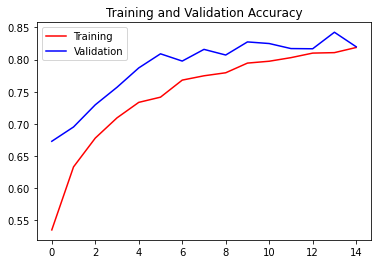

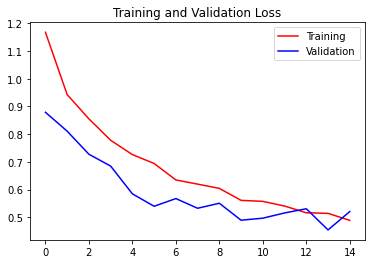

In [15]:
# Visualize the train / test accuracy as well as loss
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

loss = history.history['loss']
val_loss = history.history['val_loss']
#---------------------------------------------------#
plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
#---------------------------------------------------#
plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Adjust the batch_size parameter..

In [17]:
# ImageDataGen
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 30,
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                              target_size = (150, 150),
                              batch_size = 30,
                              class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [19]:
# Create our DNN
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.summary()

# Compiling
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('acc') > 0.99):
            print('\n Achieved 99% training accuracy so cancel training!')
            self.model.stop_training = True

callbacks = myCallback()

# Training
history = model.fit_generator(train_generator, 
                              steps_per_epoch = 468, 
                              epochs = 15, 
                              validation_data = test_generator, 
                              validation_steps = 100,
                              verbose = 1,
                              callbacks = [callbacks])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

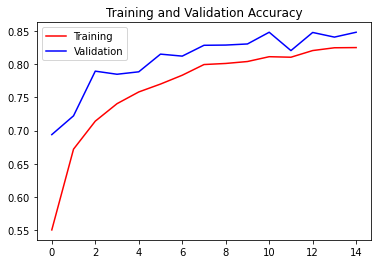

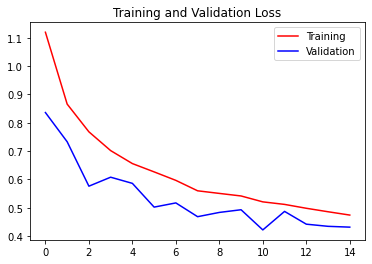

In [20]:
# Visualize the train / test accuracy as well as loss
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

loss = history.history['loss']
val_loss = history.history['val_loss']
#---------------------------------------------------#
plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
#---------------------------------------------------#
plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Let's see training without image augmentation..

In [21]:
# ImageDataGen
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 30,
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                              target_size = (150, 150),
                              batch_size = 30,
                              class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [22]:
# Create our DNN
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.summary()

# Compiling
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('acc') > 0.99):
            print('\n Achieved 99% training accuracy so cancel training!')
            self.model.stop_training = True

callbacks = myCallback()

# Training
history = model.fit_generator(train_generator, 
                              steps_per_epoch = 468, 
                              epochs = 15, 
                              validation_data = test_generator, 
                              validation_steps = 100,
                              verbose = 1,
                              callbacks = [callbacks])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

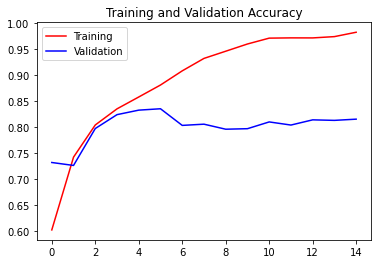

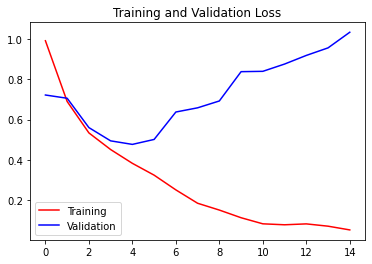

In [23]:
# Visualize the train / test accuracy as well as loss
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

loss = history.history['loss']
val_loss = history.history['val_loss']
#---------------------------------------------------#
plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
#---------------------------------------------------#
plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Clearly we're overfitting..

# Perform transfer learning with VGG16 model

In [26]:
# Define pre-trained model

from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions

pre_trained_model = VGG16(include_top = True, weights = 'imagenet')

In [27]:
# model summary
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [28]:
# Make sure there's not need to retrain
for layer in pre_trained_model.layers:
    layer.trainable = False

In [29]:
# Define our last output
last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [32]:
# Build our fully-connected layer
from tensorflow.keras import layers

# Flatten
x = layers.Flatten()(last_output)
# Fully-connected layer
x = layers.Dense(1024, activation = 'relu')(x)
# Add dropout
x = layers.Dropout(0.5)(x)
# Output layer
x = layers.Dense(6, activation = 'softmax')(x)

In [33]:
# Reconfirm model summary
from tensorflow.keras import Model

model = Model(pre_trained_model.input, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
# ImageDataGen
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (224, 224),
                                                    batch_size = 30,
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                              target_size = (224, 224),
                              batch_size = 30,
                              class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [35]:
# Compiling
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('acc') > 0.99):
            print('\n Achieved 99% training accuracy so cancel training!')
            self.model.stop_training = True

callbacks = myCallback()

# Training
history = model.fit_generator(train_generator, 
                              steps_per_epoch = 468, 
                              epochs = 15, 
                              validation_data = test_generator, 
                              validation_steps = 100,
                              verbose = 1,
                              callbacks = [callbacks])

Epoch 1/15
468/468 [==============================] - 7903s 17s/step - loss: 1.5398 - acc: 0.7589 - val_loss: 0.3807 - val_acc: 0.8597
Epoch 2/15
468/468 [==============================] - 2722s 6s/step - loss: 0.3978 - acc: 0.8557 - val_loss: 0.3735 - val_acc: 0.8650
Epoch 3/15
468/468 [==============================] - 5041s 11s/step - loss: 0.3516 - acc: 0.8729 - val_loss: 0.3617 - val_acc: 0.8637
Epoch 4/15
468/468 [==============================] - 2779s 6s/step - loss: 0.3115 - acc: 0.8837 - val_loss: 0.4178 - val_acc: 0.8430
Epoch 5/15
468/468 [==============================] - 2769s 6s/step - loss: 0.2990 - acc: 0.8920 - val_loss: 0.3790 - val_acc: 0.8777
Epoch 6/15
468/468 [==============================] - 2675s 6s/step - loss: 0.2649 - acc: 0.9034 - val_loss: 0.3632 - val_acc: 0.8733
Epoch 7/15
468/468 [==============================] - 2667s 6s/step - loss: 0.2541 - acc: 0.9084 - val_loss: 0.3356 - val_acc: 0.8903
Epoch 8/15
468/468 [==============================] - 2673s 

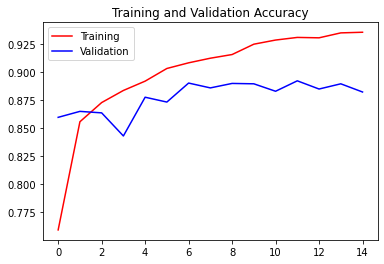

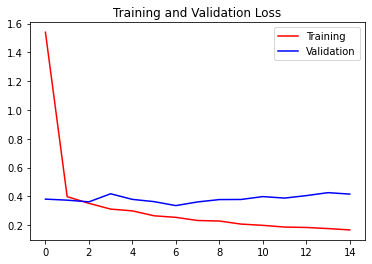

In [36]:
# Visualize the train / test accuracy as well as loss
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

loss = history.history['loss']
val_loss = history.history['val_loss']
#---------------------------------------------------#
plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
#---------------------------------------------------#
plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

By applying transfer learning, we see that the training and validation accuracy have been improved.

## Fun with image testing

[[0. 0. 1. 0. 0. 0.]]


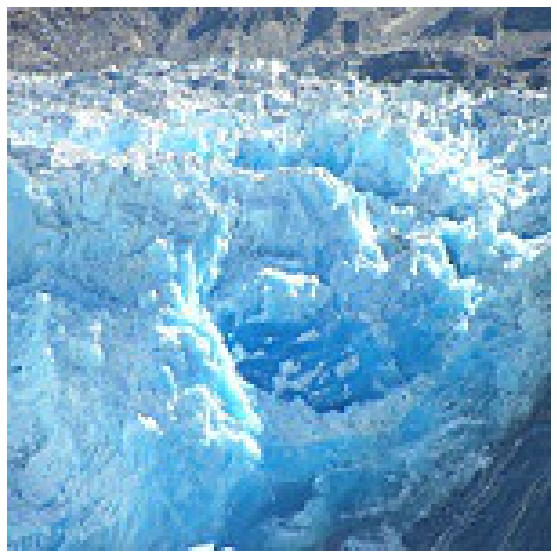

In [42]:
import numpy as np
import matplotlib.image as mpimg
from keras.preprocessing import image
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

# predicting images
path='Intel Image Classification/seg_test/glacier/20087.jpg' 
img=image.load_img(path, target_size=(224, 224))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images)

img_check = mpimg.imread(path)
plt.axis('Off')
plt.imshow(img_check)

print(classes)

[[0. 0. 0. 0. 0. 1.]]


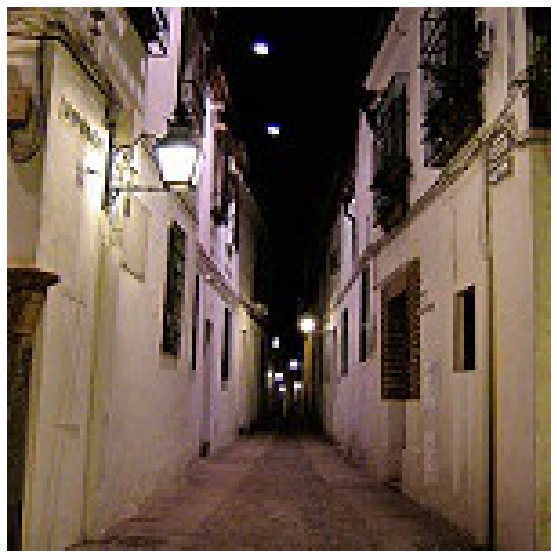

In [43]:
import numpy as np
import matplotlib.image as mpimg
from keras.preprocessing import image
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

# predicting images
path='Intel Image Classification/seg_test/street/20158.jpg' 
img=image.load_img(path, target_size=(224, 224))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images)

img_check = mpimg.imread(path)
plt.axis('Off')
plt.imshow(img_check)

print(classes)

[[0. 0. 0. 0. 1. 0.]]


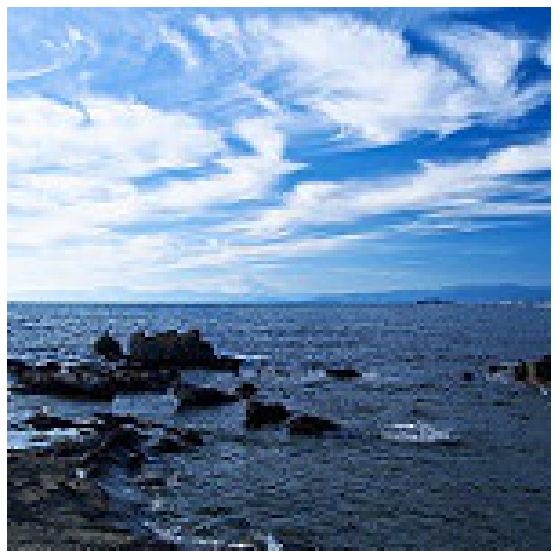

In [45]:
import numpy as np
import matplotlib.image as mpimg
from keras.preprocessing import image
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

# predicting images
path='Intel Image Classification/seg_test/sea/20316.jpg' 
img=image.load_img(path, target_size=(224, 224))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images)

img_check = mpimg.imread(path)
plt.axis('Off')
plt.imshow(img_check)

print(classes)